In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print("Current working directory:", os.getcwd())

# Load the data file
df = pd.read_csv("data/sample_orig_2021.txt", delimiter = "|")

df.columns = [
    'credit_score', 'first_payment_date', 'flag', 'maturity_date', 'Unnamed_4',
    'msa', 'mi_percent', 'product_type', 'num_units', 'occupancy', 'cltv',
    'dti', 'upb', 'purpose', 'property_type', 'loan_type', 'state',
    'postal_code', 'orig_rate', 'id', 'channel', 'term', 'seller', 'servicer',
    'Unnamed_25', 'Unnamed_26', 'Unnamed_27', 'Unnamed_28', 'Unnamed_29',
    'Unnamed_30', 'Unnamed_31', 'Unnamed_32'
]

# Convert to numeric, coercing errors to NaN
df['credit_score'] = pd.to_numeric(df['credit_score'], errors = 'coerce')
df['cltv'] = pd.to_numeric(df['cltv'], errors = 'coerce')

# Filter rows with valid credit_score and cltv ranges
df = df[(df['credit_score'] >= 300) & (df['credit_score'] <= 850)]
df = df[(df['cltv'] >= 0) & (df['cltv'] <= 1000)]

df['occupancy'] = df['occupancy'].astype(str).str.strip()
df = df[(df['occupancy'].notnull()) & (df['occupancy'] != '')]

Current working directory: C:\Users\Admin\SPARK 2025\SPARK-mortgage-risk


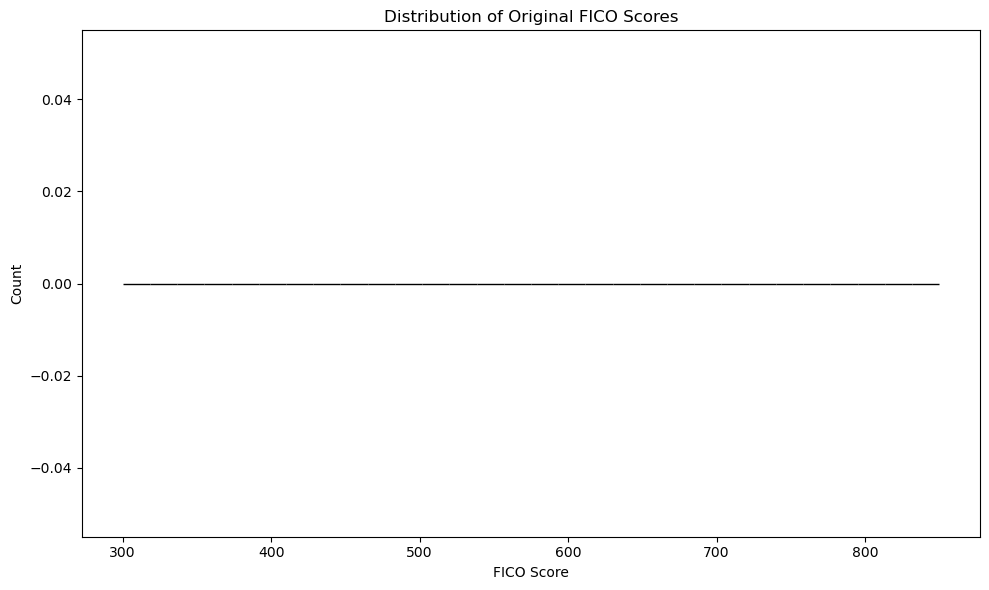

In [307]:
# Histogram of FICO Scores
plt.figure(figsize = (10,6))
df['credit_score'].hist(bins = 30, range = (300, 850), color = 'steelblue', edgecolor = 'black')
plt.title('Distribution of Original FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()


In [308]:
print(df.columns.tolist())

['credit_score', 'first_payment_date', 'flag', 'maturity_date', 'Unnamed_4', 'msa', 'mi_percent', 'product_type', 'num_units', 'occupancy', 'cltv', 'dti', 'upb', 'purpose', 'property_type', 'loan_type', 'state', 'postal_code', 'orig_rate', 'id', 'channel', 'term', 'seller', 'servicer', 'Unnamed_25', 'Unnamed_26', 'Unnamed_27', 'Unnamed_28', 'Unnamed_29', 'Unnamed_30', 'Unnamed_31', 'Unnamed_32']


In [309]:
print(df.iloc[:, 0].head())

Series([], Name: credit_score, dtype: int64)


In [310]:
print(df['credit_score'].unique())

[]


In [311]:
df['credit_score'] = pd.to_numeric(df['credit_score'], errors = 'coerce')
df = df[(df['credit_score'] >= 300) & (df['credit_score'] <= 850)]
#df = df.dropna(subset=['credit_score'])

In [312]:
print(df['credit_score'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: credit_score, dtype: float64


In [313]:
print(len(df.columns))
print(df.columns.tolist())

32
['credit_score', 'first_payment_date', 'flag', 'maturity_date', 'Unnamed_4', 'msa', 'mi_percent', 'product_type', 'num_units', 'occupancy', 'cltv', 'dti', 'upb', 'purpose', 'property_type', 'loan_type', 'state', 'postal_code', 'orig_rate', 'id', 'channel', 'term', 'seller', 'servicer', 'Unnamed_25', 'Unnamed_26', 'Unnamed_27', 'Unnamed_28', 'Unnamed_29', 'Unnamed_30', 'Unnamed_31', 'Unnamed_32']


In [314]:
#Convert CLTV to numeric values and remove invalid values

df['cltv'] = pd.to_numeric(df['cltv'], errors = 'coerce')
df = df[(df['cltv'] >= 0) & (df['cltv'] <= 1000)]

In [315]:
# Average FICO Score by occupancy
grouped_df = df[['occupancy', 'credit_score']].dropna()

avg_fico_by_occupancy = df.groupby('occupancy')['credit_score'].mean()

print(avg_fico_by_occupancy)
# bar
if not avg_fico_by_occupancy.empty:
    avg_fico_by_occupancy.plot(kind = 'bar', color = 'skyblue', figsize = (10,6))
    plt.title('Average FICO Score by Occupancy Status')
    plt.xlabel('Occupancy Code')
    plt.ylabel('Average FICO Score')
    plt.xticks(rotation = 45)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot for average FICO by occupancy.")


Series([], Name: credit_score, dtype: float64)
No data to plot for average FICO by occupancy.


In [316]:

# Average CLTV by channel
avg_ltv_by_channel = df.groupby('channel')['cltv'].mean().sort_values()

print(avg_ltv_by_channel)

# Bar chart
if not avg_ltv_by_channel.empty:
    plt.figure(figsize = (10,6))
    avg_ltv_by_channel.plot(kind = 'bar', color = 'salmon')
    plt.title('Average CLTV by Channel')
    plt.xlabel('Channel')
    plt.ylabel('Average CLTV')
    plt.xticks(rotation = 45)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'avg_ltv_by_channel' is empty. Nothing to plot.")


Series([], Name: cltv, dtype: float64)


In [317]:

print(df['occupancy'].head(10))

#Just check how many scores are numeric and within range
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')

print("Before filtering:", len(df))
print("After dropping NaNs:", df['credit_score'].notna().sum())
print("In range 300–850:", ((df['credit_score'] >= 300) & (df['credit_score'] <= 850)).sum())



In [318]:
print(df[['occupancy', 'credit_score']].head())
print(df['occupancy'].value_counts())
print(df['credit_score'].describe())


In [319]:
print(df.columns)  # Check column names

print(df[['occupancy', 'credit_score']].head(10))  # First 10 rows

print(df[['occupancy', 'credit_score']].info())  # Info on types & nulls

print(df[['occupancy', 'credit_score']].dropna().shape)  # Rows with no missing values in those columns



In [320]:
print("TOTAL ROWS:", len(df))
print("OCCUPANCY UNIQUE VALUES:\n", df['occupancy'].value_counts(dropna=False))
print("CREDIT SCORE TYPE:", df['credit_score'].dtype)
print("CREDIT SCORE STATS:\n", df['credit_score'].describe())
print("NULLS in OCCUPANCY:", df['occupancy'].isnull().sum())
print("NULLS in CREDIT SCORE:", df['credit_score'].isnull().sum())
print("ROWS with valid occupancy and credit score:", df[['occupancy', 'credit_score']].dropna().shape[0])
print(df[['occupancy', 'credit_score']].dropna().head(10))

In [321]:
df_clean = df.dropna(subset = ['channel', 'cltv'])
df_clean = df_clean[(df_clean['cltv'] >= 0) & (df_clean['cltv'] <= 1000)]

avg_ltv_by_channel = df_clean.groupby('channel')['cltv'].mean().sort_values()

if not avg_ltv_by_channel.empty:
    plt.figure(figsize = (10,6))
    avg_ltv_by_channel.plot(kind = 'bar', color = 'salmon')
    plt.title('Average CLTV by Channel')
    plt.xlabel('Channel')
    plt.ylabel('Average CLTV')
    plt.xticks(rotation = 45)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot for average CLTV by channel")




No data to plot for average CLTV by channel


In [322]:
print("Original df shape:", df.shape)
print("Missing 'channel' or 'cltv':", df[df[['channel', 'cltv']].isnull().any(axis=1)].shape)
print("Negative or >1000 CLTV values:", df[(df['cltv'] < 0) | (df['cltv'] > 1000)].shape)

df_clean = df.dropna(subset = ['channel', 'cltv'])
df_clean = df_clean[(df_clean['cltv'] >= 0) & (df_clean['cltv'] <= 1000)]

print("Cleaned df shape:", df_clean.shape)
print("Unique channels after cleaning:", df_clean['channel'].unique())


Original df shape: (0, 32)
Missing 'channel' or 'cltv': (0, 32)
Negative or >1000 CLTV values: (0, 32)
Cleaned df shape: (0, 32)
Unique channels after cleaning: []


In [323]:
print(os.listdir('data'))

['sample_orig_2021.txt']


In [324]:
import pandas as pd

df = pd.read_csv('data/sample_orig_2021.txt', delimiter = '|')  # change to actual name if different
print("Shape of the DataFrame:", df.shape)
df.head()


Shape of the DataFrame: (49999, 32)


,776,202103,N,205102,Unnamed: 4,000,1,P,52,12,...,01,Other sellers,Other servicers,Unnamed: 25,Unnamed: 26,9,Unnamed: 28,3,N.3,7
0,746,202103,N,205102,NaN,30,1,P,95,33,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,N
1,710,202103,N,204102,NaN,0,1,P,65,50,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
2,722,202103,N,205102,16984.0,25,1,P,89,40,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N,N
3,761,202103,N,205102,29020.0,0,1,P,56,50,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
4,675,202103,N,203602,NaN,0,1,P,37,27,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
